# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 10</font>

## Download: http://github.com/dsacademybr

## Mini-Projeto 3 - Guia de Modelagem Preditiva com Linguagem Python e TensorFlow

![title](imagens/mini-projeto3.png)

Neste Mini-Projeto vamos apresentar um guia básico de modelagem preditiva usando Linguagem Python e TensorFlow, o principal framework para construção de modelos de Machine Learning e Deep Learning e para construir aplicações comerciais de Inteligência Artificial.

Este é um guia básico pois o TensorFlow é um framework extenso. O TensorFlow é abordado em detalhes nos cursos da <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial">Formação Inteligência Artificial</a> (especialmente no curso Deep Learning Frameworks) e na <a href="https://www.datascienceacademy.com.br/bundle/formacao-inteligencia-artificial-aplicada-a-medicina">Formação IA Aplicada à Medicina</a>.

Na <a href="https://www.datascienceacademy.com.br/bundle/formacao-cientista-de-dados">Formação Cientista de Dados</a>, no curso de Machine Learning também há um módulo sobre TensorFlow. Alguns projetos com TensorFlow podem ser encontrados no curso de IA Aplicada a Finanças da <a href="https://www.datascienceacademy.com.br/bundle/formacao-engenheiro-blockchain">Formação Engenheiro Blockchain</a>.

## Instalando e Carregando Pacotes

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Instala o TensorFlow
!pip install -q tensorflow==2.5

In [3]:
# Instala o Pydot
!pip install -q pydot

In [7]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.11.0


## Carregando os Dados

### Boston House Prices Dataset

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

#### Características:

* Número de Observções: 506
* Os primeiros 13 recursos são recursos preditivos numéricos / categóricos. 
* O último (atributo 14): o valor mediano é a variável de destino.

In [9]:
# Download dos dados
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
dataset_path = keras.utils.get_file("housing.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data")

49082/49082 [==============================] - 0s 4us/step


In [10]:
# Nomes das colunas
nomes_colunas = ['CRIM',
                 'ZN',
                 'INDUS',
                 'CHAS',
                 'NOX',
                 'RM', 
                 'AGE', 
                 'DIS',
                 'RAD',
                 'TAX',
                 'PTRATION', 
                 'B', 
                 'LSTAT', 
                 'MEDV']

In [11]:
# Carrega os dados
dataset = pd.read_csv(dataset_path, 
                      names = nomes_colunas,
                      na_values = "?", 
                      comment = '\t',
                      sep = " ", 
                      skipinitialspace = True)

In [12]:
# Shape
dataset.shape

(506, 14)

In [13]:
# Visualiza os dados
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Vamos dividir os dados em treino e teste com proporção 80/20.

In [14]:
# Split dos dados
dados_treino = dataset.sample(frac = 0.8, random_state = 0)
dados_teste = dataset.drop(dados_treino.index)

## Modelagem Preditiva - Regressão Linear Simples

Na regressão linear simples desejamos modelar a relação entre a variável dependente (y) e uma variável independente (x).

* Variável independente: 'RM'
* Variável dependente: 'MEDV'

Queremos prever o valor da mediana das casas ocupadas por proprietários com base no número de quartos.

Vamos criar um plot mostrando a relação atual entre as variáveis.

Basicamente temos $MEDV=f(RM)$ e queremos estimar a função $f()$ usando regressão linear.

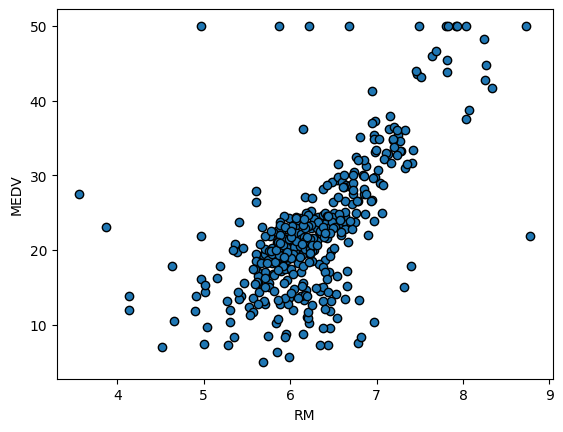

In [16]:
# Representação visual dos dados de treino
fig, ax = plt.subplots()
x = dados_treino['RM']
y = dados_treino['MEDV']
ax.scatter(x, y, edgecolors = (0, 0, 0))
ax.set_xlabel('RM')
ax.set_ylabel('MEDV')
plt.show()

Vamos separar x e y.

In [19]:
# Divisão
x_treino = dados_treino['RM']
y_treino = dados_treino['MEDV']
x_teste = dados_teste['RM']
y_teste = dados_teste['MEDV']

## Criação do Modelo

Queremos encontrar os parâmetros (**W**) que permitem prever a saída y a partir da entrada x:

$y = w_1 x + w_0$

A fórmula acima pode ser definida com a seguinte camada densa em um modelo de rede neural artificial:

*layers.Dense(1, use_bias=True, input_shape=(1,))*

In [20]:
# Função para construir o modelo
def modelo_linear():
    
    # Cria o modelo
    model = keras.Sequential([layers.Dense(1, use_bias = True, input_shape = (1,), name = 'layer')])

    # Otimizador
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01, 
                                         beta_1 = 0.9, 
                                         beta_2 = 0.99, 
                                         epsilon = 1e-05, 
                                         amsgrad = False, 
                                         name = 'Adam')
    
    # Compila o modelo
    model.compile(loss = 'mse', 
                  optimizer = optimizer, 
                  metrics = ['mae','mse'])

    return model

MAE = Mean Absolute Error

MSE = Mean Squared Error

In [22]:
# Cria o modelo 
modelo = modelo_linear()

In [25]:
# Plot do modelo
tf.keras.utils.plot_model(modelo, 
                          to_file = 'imagens/modelo.png', 
                          show_shapes = True, 
                          show_layer_names = True,
                          rankdir = 'TB', 
                          expand_nested = False, 
                          dpi = 100)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### Treinamento do Modelo

In [27]:
# Hiperparâmetros
n_epochs = 4000
batch_size = 256
n_idle_epochs = 100
n_epochs_log = 200
n_samples_save = n_epochs_log * x_treino.shape[0]
print('Checkpoint salvo a cada {} amostras'.format(n_samples_save))

Checkpoint salvo a cada 81000 amostras


In [28]:
# Callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', 
                                                 patience = n_idle_epochs, 
                                                 min_delta = 0.001)

In [29]:
# Lista para as previsões
predictions_list = []

In [30]:
# Caminho ppara salvar o checkpoint
checkpoint_path = "dados/"

In [31]:
# Create a callback that saves the model's weights every n_samples_save
checkpointCallback = tf.keras.callbacks.ModelCheckpoint(filepath = "dados/", 
                                                        verbose = 1, 
                                                        save_weights_only = True,
                                                        save_freq = n_samples_save)

In [33]:
# Salva a primeira versão do modelo
modelo.save_weights(checkpoint_path.format(epoch = 0))

In [34]:
# Treinamento
history = modelo.fit(x_treino, 
                     y_treino, 
                     batch_size = batch_size,
                     epochs = n_epochs, 
                     validation_split = 0.1, 
                     verbose = 1, 
                     callbacks = [earlyStopping, checkpointCallback])

Epoch 1/4000
2/2 [==============================] - 0s 125ms/step - loss: 767.7759 - mae: 26.1929 - mse: 767.7759 - val_loss: 866.1879 - val_mae: 27.4776 - val_mse: 866.1879
Epoch 2/4000
2/2 [==============================] - 0s 21ms/step - loss: 759.9441 - mae: 26.0474 - mse: 759.9441 - val_loss: 858.0529 - val_mae: 27.3317 - val_mse: 858.0529
Epoch 3/4000
2/2 [==============================] - 0s 21ms/step - loss: 752.2734 - mae: 25.9023 - mse: 752.2734 - val_loss: 849.9611 - val_mae: 27.1858 - val_mse: 849.9611
Epoch 4/4000
2/2 [==============================] - 0s 22ms/step - loss: 744.5984 - mae: 25.7570 - mse: 744.5984 - val_loss: 841.9218 - val_mae: 27.0401 - val_mse: 841.9218
Epoch 5/4000
2/2 [==============================] - 0s 23ms/step - loss: 736.9363 - mae: 25.6119 - mse: 736.9363 - val_loss: 833.9324 - val_mae: 26.8945 - val_mse: 833.9324
Epoch 6/4000
2/2 [==============================] - 0s 21ms/step - loss: 729.3777 - mae: 25.4669 - mse: 729.3777 - val_loss: 825.9905 

2/2 [==============================] - 0s 21ms/step - loss: 459.8517 - mae: 19.6412 - mse: 459.8517 - val_loss: 542.5303 - val_mae: 20.9113 - val_mse: 542.5303
Epoch 49/4000
2/2 [==============================] - 0s 21ms/step - loss: 454.5780 - mae: 19.5095 - mse: 454.5780 - val_loss: 536.9116 - val_mae: 20.7792 - val_mse: 536.9116
Epoch 50/4000
2/2 [==============================] - 0s 20ms/step - loss: 449.3693 - mae: 19.3780 - mse: 449.3693 - val_loss: 531.3566 - val_mae: 20.6478 - val_mse: 531.3566
Epoch 51/4000
2/2 [==============================] - 0s 21ms/step - loss: 444.0998 - mae: 19.2472 - mse: 444.0998 - val_loss: 525.8706 - val_mae: 20.5173 - val_mse: 525.8706
Epoch 52/4000
2/2 [==============================] - 0s 21ms/step - loss: 438.9764 - mae: 19.1172 - mse: 438.9764 - val_loss: 520.4279 - val_mae: 20.3869 - val_mse: 520.4279
Epoch 53/4000
2/2 [==============================] - 0s 21ms/step - loss: 433.9239 - mae: 18.9874 - mse: 433.9239 - val_loss: 515.0338 - val_mae

2/2 [==============================] - 0s 19ms/step - loss: 259.5739 - mae: 13.9003 - mse: 259.5739 - val_loss: 328.5786 - val_mae: 15.1719 - val_mse: 328.5786
Epoch 96/4000
2/2 [==============================] - 0s 20ms/step - loss: 256.2709 - mae: 13.7902 - mse: 256.2709 - val_loss: 325.0384 - val_mae: 15.0627 - val_mse: 325.0384
Epoch 97/4000
2/2 [==============================] - 0s 21ms/step - loss: 252.9780 - mae: 13.6791 - mse: 252.9780 - val_loss: 321.5448 - val_mae: 14.9542 - val_mse: 321.5448
Epoch 98/4000
2/2 [==============================] - 0s 20ms/step - loss: 249.7905 - mae: 13.5703 - mse: 249.7905 - val_loss: 318.0783 - val_mae: 14.8457 - val_mse: 318.0783
Epoch 99/4000
2/2 [==============================] - 0s 21ms/step - loss: 246.6495 - mae: 13.4621 - mse: 246.6495 - val_loss: 314.6445 - val_mae: 14.7374 - val_mse: 314.6445
Epoch 100/4000
2/2 [==============================] - 0s 22ms/step - loss: 243.5082 - mae: 13.3554 - mse: 243.5082 - val_loss: 311.2509 - val_ma

Epoch 142/4000
2/2 [==============================] - 0s 20ms/step - loss: 141.1244 - mae: 9.4218 - mse: 141.1244 - val_loss: 198.5740 - val_mae: 10.8894 - val_mse: 198.5740
Epoch 143/4000
2/2 [==============================] - 0s 21ms/step - loss: 139.2482 - mae: 9.3430 - mse: 139.2482 - val_loss: 196.5445 - val_mae: 10.8153 - val_mse: 196.5445
Epoch 144/4000
2/2 [==============================] - 0s 22ms/step - loss: 137.4841 - mae: 9.2644 - mse: 137.4841 - val_loss: 194.5231 - val_mae: 10.7407 - val_mse: 194.5231
Epoch 145/4000
2/2 [==============================] - 0s 20ms/step - loss: 135.7624 - mae: 9.1892 - mse: 135.7624 - val_loss: 192.5227 - val_mae: 10.6662 - val_mse: 192.5227
Epoch 146/4000
2/2 [==============================] - 0s 20ms/step - loss: 134.0108 - mae: 9.1130 - mse: 134.0108 - val_loss: 190.5600 - val_mae: 10.5925 - val_mse: 190.5600
Epoch 147/4000
2/2 [==============================] - 0s 21ms/step - loss: 132.2991 - mae: 9.0376 - mse: 132.2991 - val_loss: 188.

2/2 [==============================] - 0s 21ms/step - loss: 81.6222 - mae: 6.6783 - mse: 81.6222 - val_loss: 129.6631 - val_mae: 8.2092 - val_mse: 129.6631
Epoch 190/4000
2/2 [==============================] - 0s 20ms/step - loss: 80.8903 - mae: 6.6387 - mse: 80.8903 - val_loss: 128.7224 - val_mae: 8.1721 - val_mse: 128.7224
Epoch 191/4000
2/2 [==============================] - 0s 20ms/step - loss: 80.1406 - mae: 6.5981 - mse: 80.1406 - val_loss: 127.8087 - val_mae: 8.1356 - val_mse: 127.8087
Epoch 192/4000
2/2 [==============================] - 0s 21ms/step - loss: 79.3837 - mae: 6.5566 - mse: 79.3837 - val_loss: 126.9176 - val_mae: 8.0996 - val_mse: 126.9176
Epoch 193/4000
2/2 [==============================] - 0s 20ms/step - loss: 78.6517 - mae: 6.5171 - mse: 78.6517 - val_loss: 126.0352 - val_mae: 8.0635 - val_mse: 126.0352
Epoch 194/4000
2/2 [==============================] - 0s 21ms/step - loss: 77.9855 - mae: 6.4797 - mse: 77.9855 - val_loss: 125.1574 - val_mae: 8.0272 - val_mse

Epoch 237/4000
2/2 [==============================] - 0s 21ms/step - loss: 59.8716 - mae: 5.4319 - mse: 59.8716 - val_loss: 100.9562 - val_mae: 7.0292 - val_mse: 100.9562
Epoch 238/4000
2/2 [==============================] - 0s 21ms/step - loss: 59.6862 - mae: 5.4226 - mse: 59.6862 - val_loss: 100.6517 - val_mae: 7.0195 - val_mse: 100.6517
Epoch 239/4000
2/2 [==============================] - 0s 21ms/step - loss: 59.4959 - mae: 5.4121 - mse: 59.4959 - val_loss: 100.3584 - val_mae: 7.0108 - val_mse: 100.3584
Epoch 240/4000
2/2 [==============================] - 0s 20ms/step - loss: 59.3288 - mae: 5.4036 - mse: 59.3288 - val_loss: 100.0752 - val_mae: 7.0034 - val_mse: 100.0752
Epoch 241/4000
2/2 [==============================] - 0s 25ms/step - loss: 59.1465 - mae: 5.3934 - mse: 59.1465 - val_loss: 99.8052 - val_mae: 6.9962 - val_mse: 99.8052
Epoch 242/4000
2/2 [==============================] - 0s 23ms/step - loss: 58.9996 - mae: 5.3848 - mse: 58.9996 - val_loss: 99.5433 - val_mae: 6.98

2/2 [==============================] - 0s 23ms/step - loss: 55.9658 - mae: 5.3034 - mse: 55.9658 - val_loss: 93.4709 - val_mae: 6.8368 - val_mse: 93.4709
Epoch 286/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.9513 - mae: 5.3048 - mse: 55.9513 - val_loss: 93.4145 - val_mae: 6.8364 - val_mse: 93.4145
Epoch 287/4000
2/2 [==============================] - 0s 22ms/step - loss: 55.9380 - mae: 5.3057 - mse: 55.9380 - val_loss: 93.3622 - val_mae: 6.8361 - val_mse: 93.3622
Epoch 288/4000
2/2 [==============================] - 0s 24ms/step - loss: 55.9180 - mae: 5.3066 - mse: 55.9180 - val_loss: 93.3139 - val_mae: 6.8358 - val_mse: 93.3139
Epoch 289/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.9100 - mae: 5.3078 - mse: 55.9100 - val_loss: 93.2639 - val_mae: 6.8355 - val_mse: 93.2639
Epoch 290/4000
2/2 [==============================] - 0s 22ms/step - loss: 55.8914 - mae: 5.3085 - mse: 55.8914 - val_loss: 93.2169 - val_mae: 6.8352 - val_mse: 93.2169
E

2/2 [==============================] - 0s 20ms/step - loss: 55.6901 - mae: 5.3371 - mse: 55.6901 - val_loss: 92.3556 - val_mae: 6.8263 - val_mse: 92.3556
Epoch 334/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.6874 - mae: 5.3377 - mse: 55.6874 - val_loss: 92.3458 - val_mae: 6.8261 - val_mse: 92.3458
Epoch 335/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.6838 - mae: 5.3379 - mse: 55.6838 - val_loss: 92.3403 - val_mae: 6.8260 - val_mse: 92.3403
Epoch 336/4000
2/2 [==============================] - 0s 23ms/step - loss: 55.6811 - mae: 5.3379 - mse: 55.6811 - val_loss: 92.3344 - val_mae: 6.8258 - val_mse: 92.3344
Epoch 337/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.6781 - mae: 5.3381 - mse: 55.6781 - val_loss: 92.3227 - val_mae: 6.8256 - val_mse: 92.3227
Epoch 338/4000
2/2 [==============================] - 0s 22ms/step - loss: 55.6780 - mae: 5.3389 - mse: 55.6780 - val_loss: 92.3066 - val_mae: 6.8254 - val_mse: 92.3066
E

2/2 [==============================] - 0s 21ms/step - loss: 55.5422 - mae: 5.3411 - mse: 55.5422 - val_loss: 92.0698 - val_mae: 6.8173 - val_mse: 92.0698
Epoch 382/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.5385 - mae: 5.3408 - mse: 55.5385 - val_loss: 92.0702 - val_mae: 6.8171 - val_mse: 92.0702
Epoch 383/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.5349 - mae: 5.3404 - mse: 55.5349 - val_loss: 92.0703 - val_mae: 6.8169 - val_mse: 92.0703
Epoch 384/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.5313 - mae: 5.3400 - mse: 55.5313 - val_loss: 92.0775 - val_mae: 6.8168 - val_mse: 92.0775
Epoch 385/4000
2/2 [==============================] - 0s 20ms/step - loss: 55.5288 - mae: 5.3390 - mse: 55.5288 - val_loss: 92.0928 - val_mae: 6.8167 - val_mse: 92.0928
Epoch 386/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.5229 - mae: 5.3377 - mse: 55.5229 - val_loss: 92.1014 - val_mae: 6.8165 - val_mse: 92.1014
E

2/2 [==============================] - 0s 21ms/step - loss: 55.3273 - mae: 5.3310 - mse: 55.3273 - val_loss: 91.8695 - val_mae: 6.8051 - val_mse: 91.8695
Epoch 430/4000
2/2 [==============================] - 0s 20ms/step - loss: 55.3232 - mae: 5.3318 - mse: 55.3232 - val_loss: 91.8554 - val_mae: 6.8047 - val_mse: 91.8554
Epoch 431/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.3175 - mae: 5.3321 - mse: 55.3175 - val_loss: 91.8513 - val_mae: 6.8044 - val_mse: 91.8513
Epoch 432/4000
2/2 [==============================] - 0s 22ms/step - loss: 55.3129 - mae: 5.3317 - mse: 55.3129 - val_loss: 91.8521 - val_mae: 6.8041 - val_mse: 91.8521
Epoch 433/4000
2/2 [==============================] - 0s 22ms/step - loss: 55.3080 - mae: 5.3313 - mse: 55.3080 - val_loss: 91.8466 - val_mae: 6.8038 - val_mse: 91.8466
Epoch 434/4000
2/2 [==============================] - 0s 20ms/step - loss: 55.3002 - mae: 5.3306 - mse: 55.3002 - val_loss: 91.8553 - val_mae: 6.8036 - val_mse: 91.8553
E

2/2 [==============================] - 0s 22ms/step - loss: 55.0306 - mae: 5.3201 - mse: 55.0306 - val_loss: 91.5569 - val_mae: 6.7877 - val_mse: 91.5569
Epoch 478/4000
2/2 [==============================] - 0s 22ms/step - loss: 55.0262 - mae: 5.3217 - mse: 55.0262 - val_loss: 91.5313 - val_mae: 6.7872 - val_mse: 91.5313
Epoch 479/4000
2/2 [==============================] - 0s 21ms/step - loss: 55.0205 - mae: 5.3226 - mse: 55.0205 - val_loss: 91.5131 - val_mae: 6.7867 - val_mse: 91.5131
Epoch 480/4000
2/2 [==============================] - 0s 20ms/step - loss: 55.0169 - mae: 5.3236 - mse: 55.0169 - val_loss: 91.4881 - val_mae: 6.7861 - val_mse: 91.4881
Epoch 481/4000
2/2 [==============================] - 0s 22ms/step - loss: 55.0085 - mae: 5.3244 - mse: 55.0085 - val_loss: 91.4867 - val_mae: 6.7857 - val_mse: 91.4867
Epoch 482/4000
2/2 [==============================] - 0s 21ms/step - loss: 54.9998 - mae: 5.3234 - mse: 54.9998 - val_loss: 91.4979 - val_mae: 6.7854 - val_mse: 91.4979
E

2/2 [==============================] - 0s 22ms/step - loss: 54.6729 - mae: 5.3029 - mse: 54.6729 - val_loss: 91.2668 - val_mae: 6.7668 - val_mse: 91.2668
Epoch 526/4000
2/2 [==============================] - 0s 23ms/step - loss: 54.6588 - mae: 5.3026 - mse: 54.6588 - val_loss: 91.2350 - val_mae: 6.7662 - val_mse: 91.2350
Epoch 527/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.6527 - mae: 5.3044 - mse: 54.6527 - val_loss: 91.1897 - val_mae: 6.7654 - val_mse: 91.1897
Epoch 528/4000
2/2 [==============================] - 0s 23ms/step - loss: 54.6492 - mae: 5.3070 - mse: 54.6492 - val_loss: 91.1611 - val_mae: 6.7648 - val_mse: 91.1611
Epoch 529/4000
2/2 [==============================] - 0s 22ms/step - loss: 54.6442 - mae: 5.3085 - mse: 54.6442 - val_loss: 91.1521 - val_mae: 6.7643 - val_mse: 91.1521
Epoch 530/4000
2/2 [==============================] - 0s 24ms/step - loss: 54.6408 - mae: 5.3075 - mse: 54.6408 - val_loss: 91.1607 - val_mae: 6.7639 - val_mse: 91.1607
E

2/2 [==============================] - 0s 21ms/step - loss: 54.2409 - mae: 5.2629 - mse: 54.2409 - val_loss: 91.2028 - val_mae: 6.7447 - val_mse: 91.2028
Epoch 574/4000
2/2 [==============================] - 0s 21ms/step - loss: 54.2332 - mae: 5.2623 - mse: 54.2332 - val_loss: 91.1943 - val_mae: 6.7441 - val_mse: 91.1943
Epoch 575/4000
2/2 [==============================] - 0s 20ms/step - loss: 54.2224 - mae: 5.2621 - mse: 54.2224 - val_loss: 91.1639 - val_mae: 6.7434 - val_mse: 91.1639
Epoch 576/4000
2/2 [==============================] - 0s 22ms/step - loss: 54.2164 - mae: 5.2632 - mse: 54.2164 - val_loss: 91.1310 - val_mae: 6.7427 - val_mse: 91.1310
Epoch 577/4000
2/2 [==============================] - 0s 21ms/step - loss: 54.2053 - mae: 5.2642 - mse: 54.2053 - val_loss: 91.1180 - val_mae: 6.7422 - val_mse: 91.1180
Epoch 578/4000
2/2 [==============================] - 0s 21ms/step - loss: 54.1962 - mae: 5.2639 - mse: 54.1962 - val_loss: 91.1165 - val_mae: 6.7417 - val_mse: 91.1165
E

2/2 [==============================] - 0s 21ms/step - loss: 53.8311 - mae: 5.2415 - mse: 53.8311 - val_loss: 90.8810 - val_mae: 6.7208 - val_mse: 90.8810
Epoch 622/4000
2/2 [==============================] - 0s 23ms/step - loss: 53.8224 - mae: 5.2406 - mse: 53.8224 - val_loss: 90.8840 - val_mae: 6.7204 - val_mse: 90.8840
Epoch 623/4000
2/2 [==============================] - 0s 24ms/step - loss: 53.8152 - mae: 5.2394 - mse: 53.8152 - val_loss: 90.8944 - val_mae: 6.7200 - val_mse: 90.8944
Epoch 624/4000
2/2 [==============================] - 0s 22ms/step - loss: 53.8075 - mae: 5.2383 - mse: 53.8075 - val_loss: 90.8952 - val_mae: 6.7195 - val_mse: 90.8952
Epoch 625/4000
2/2 [==============================] - 0s 23ms/step - loss: 53.7947 - mae: 5.2368 - mse: 53.7947 - val_loss: 90.9241 - val_mae: 6.7192 - val_mse: 90.9241
Epoch 626/4000
2/2 [==============================] - 0s 24ms/step - loss: 53.7907 - mae: 5.2345 - mse: 53.7907 - val_loss: 90.9564 - val_mae: 6.7190 - val_mse: 90.9564
E

2/2 [==============================] - 0s 20ms/step - loss: 53.4156 - mae: 5.2109 - mse: 53.4156 - val_loss: 90.6557 - val_mae: 6.6969 - val_mse: 90.6557
Epoch 670/4000
2/2 [==============================] - 0s 20ms/step - loss: 53.4052 - mae: 5.2125 - mse: 53.4052 - val_loss: 90.6080 - val_mae: 6.6961 - val_mse: 90.6080
Epoch 671/4000
2/2 [==============================] - 0s 21ms/step - loss: 53.4040 - mae: 5.2155 - mse: 53.4040 - val_loss: 90.5517 - val_mae: 6.6952 - val_mse: 90.5517
Epoch 672/4000
2/2 [==============================] - 0s 21ms/step - loss: 53.3893 - mae: 5.2173 - mse: 53.3893 - val_loss: 90.5239 - val_mae: 6.6946 - val_mse: 90.5239
Epoch 673/4000
2/2 [==============================] - 0s 20ms/step - loss: 53.3808 - mae: 5.2183 - mse: 53.3808 - val_loss: 90.4968 - val_mae: 6.6939 - val_mse: 90.4968
Epoch 674/4000
2/2 [==============================] - 0s 21ms/step - loss: 53.3732 - mae: 5.2193 - mse: 53.3732 - val_loss: 90.4742 - val_mae: 6.6932 - val_mse: 90.4742
E

2/2 [==============================] - 0s 21ms/step - loss: 52.9778 - mae: 5.1975 - mse: 52.9778 - val_loss: 90.2411 - val_mae: 6.6700 - val_mse: 90.2411
Epoch 718/4000
2/2 [==============================] - 0s 20ms/step - loss: 52.9723 - mae: 5.1933 - mse: 52.9723 - val_loss: 90.3052 - val_mae: 6.6700 - val_mse: 90.3052
Epoch 719/4000
2/2 [==============================] - 0s 21ms/step - loss: 52.9652 - mae: 5.1884 - mse: 52.9652 - val_loss: 90.3451 - val_mae: 6.6697 - val_mse: 90.3451
Epoch 720/4000
2/2 [==============================] - 0s 22ms/step - loss: 52.9561 - mae: 5.1848 - mse: 52.9561 - val_loss: 90.3483 - val_mae: 6.6693 - val_mse: 90.3483
Epoch 721/4000
2/2 [==============================] - 0s 39ms/step - loss: 52.9437 - mae: 5.1843 - mse: 52.9437 - val_loss: 90.3206 - val_mae: 6.6686 - val_mse: 90.3206
Epoch 722/4000
2/2 [==============================] - 0s 21ms/step - loss: 52.9334 - mae: 5.1849 - mse: 52.9334 - val_loss: 90.3006 - val_mae: 6.6679 - val_mse: 90.3006
E

2/2 [==============================] - 0s 21ms/step - loss: 52.5806 - mae: 5.1466 - mse: 52.5806 - val_loss: 90.3309 - val_mae: 6.6469 - val_mse: 90.3309
Epoch 766/4000
2/2 [==============================] - 0s 21ms/step - loss: 52.5710 - mae: 5.1488 - mse: 52.5710 - val_loss: 90.2679 - val_mae: 6.6460 - val_mse: 90.2679
Epoch 767/4000
2/2 [==============================] - 0s 20ms/step - loss: 52.5480 - mae: 5.1502 - mse: 52.5480 - val_loss: 90.2282 - val_mae: 6.6453 - val_mse: 90.2282
Epoch 768/4000
2/2 [==============================] - 0s 20ms/step - loss: 52.5355 - mae: 5.1514 - mse: 52.5355 - val_loss: 90.1626 - val_mae: 6.6444 - val_mse: 90.1626
Epoch 769/4000
2/2 [==============================] - 0s 21ms/step - loss: 52.5330 - mae: 5.1543 - mse: 52.5330 - val_loss: 90.0939 - val_mae: 6.6435 - val_mse: 90.0939
Epoch 770/4000
2/2 [==============================] - 0s 20ms/step - loss: 52.5200 - mae: 5.1569 - mse: 52.5200 - val_loss: 90.0558 - val_mae: 6.6428 - val_mse: 90.0558
E

2/2 [==============================] - 0s 21ms/step - loss: 52.1440 - mae: 5.1419 - mse: 52.1440 - val_loss: 89.6666 - val_mae: 6.6190 - val_mse: 89.6666
Epoch 814/4000
2/2 [==============================] - 0s 21ms/step - loss: 52.1349 - mae: 5.1438 - mse: 52.1349 - val_loss: 89.6120 - val_mae: 6.6181 - val_mse: 89.6120
Epoch 815/4000
2/2 [==============================] - 0s 20ms/step - loss: 52.1265 - mae: 5.1467 - mse: 52.1265 - val_loss: 89.5487 - val_mae: 6.6171 - val_mse: 89.5487
Epoch 816/4000
2/2 [==============================] - 0s 20ms/step - loss: 52.1277 - mae: 5.1510 - mse: 52.1277 - val_loss: 89.4950 - val_mae: 6.6162 - val_mse: 89.4950
Epoch 817/4000
2/2 [==============================] - 0s 22ms/step - loss: 52.1198 - mae: 5.1531 - mse: 52.1198 - val_loss: 89.4768 - val_mae: 6.6155 - val_mse: 89.4768
Epoch 818/4000
2/2 [==============================] - 0s 20ms/step - loss: 52.1183 - mae: 5.1540 - mse: 52.1183 - val_loss: 89.4955 - val_mae: 6.6151 - val_mse: 89.4955
E

2/2 [==============================] - 0s 22ms/step - loss: 51.7492 - mae: 5.1192 - mse: 51.7492 - val_loss: 89.3667 - val_mae: 6.5936 - val_mse: 89.3667
Epoch 862/4000
2/2 [==============================] - 0s 22ms/step - loss: 51.7378 - mae: 5.1210 - mse: 51.7378 - val_loss: 89.3496 - val_mae: 6.5930 - val_mse: 89.3496
Epoch 863/4000
2/2 [==============================] - 0s 21ms/step - loss: 51.7299 - mae: 5.1212 - mse: 51.7299 - val_loss: 89.3403 - val_mae: 6.5924 - val_mse: 89.3403
Epoch 864/4000
2/2 [==============================] - 0s 20ms/step - loss: 51.7217 - mae: 5.1207 - mse: 51.7217 - val_loss: 89.3431 - val_mae: 6.5920 - val_mse: 89.3431
Epoch 865/4000
2/2 [==============================] - 0s 21ms/step - loss: 51.7131 - mae: 5.1195 - mse: 51.7131 - val_loss: 89.3448 - val_mae: 6.5915 - val_mse: 89.3448
Epoch 866/4000
2/2 [==============================] - 0s 21ms/step - loss: 51.7039 - mae: 5.1187 - mse: 51.7039 - val_loss: 89.3360 - val_mae: 6.5909 - val_mse: 89.3360
E

2/2 [==============================] - 0s 20ms/step - loss: 51.3457 - mae: 5.0844 - mse: 51.3457 - val_loss: 89.3349 - val_mae: 6.5693 - val_mse: 89.3349
Epoch 910/4000
2/2 [==============================] - 0s 21ms/step - loss: 51.3566 - mae: 5.0825 - mse: 51.3566 - val_loss: 89.3723 - val_mae: 6.5691 - val_mse: 89.3723
Epoch 911/4000
2/2 [==============================] - 0s 20ms/step - loss: 51.3325 - mae: 5.0801 - mse: 51.3325 - val_loss: 89.3411 - val_mae: 6.5684 - val_mse: 89.3411
Epoch 912/4000
2/2 [==============================] - 0s 21ms/step - loss: 51.3192 - mae: 5.0803 - mse: 51.3192 - val_loss: 89.3274 - val_mae: 6.5678 - val_mse: 89.3274
Epoch 913/4000
2/2 [==============================] - 0s 22ms/step - loss: 51.3093 - mae: 5.0804 - mse: 51.3093 - val_loss: 89.2937 - val_mae: 6.5671 - val_mse: 89.2937
Epoch 914/4000
2/2 [==============================] - 0s 23ms/step - loss: 51.2999 - mae: 5.0817 - mse: 51.2999 - val_loss: 89.2438 - val_mae: 6.5663 - val_mse: 89.2438
E

2/2 [==============================] - 0s 21ms/step - loss: 50.9779 - mae: 5.0831 - mse: 50.9779 - val_loss: 88.6639 - val_mae: 6.5430 - val_mse: 88.6639
Epoch 958/4000
2/2 [==============================] - 0s 21ms/step - loss: 50.9766 - mae: 5.0843 - mse: 50.9766 - val_loss: 88.6500 - val_mae: 6.5426 - val_mse: 88.6500
Epoch 959/4000
2/2 [==============================] - 0s 21ms/step - loss: 50.9644 - mae: 5.0837 - mse: 50.9644 - val_loss: 88.6744 - val_mae: 6.5416 - val_mse: 88.6744
Epoch 960/4000
2/2 [==============================] - 0s 22ms/step - loss: 50.9507 - mae: 5.0808 - mse: 50.9507 - val_loss: 88.7202 - val_mae: 6.5409 - val_mse: 88.7202
Epoch 961/4000
2/2 [==============================] - 0s 21ms/step - loss: 50.9452 - mae: 5.0775 - mse: 50.9452 - val_loss: 88.7825 - val_mae: 6.5408 - val_mse: 88.7825
Epoch 962/4000
2/2 [==============================] - 0s 21ms/step - loss: 50.9263 - mae: 5.0720 - mse: 50.9263 - val_loss: 88.8283 - val_mae: 6.5407 - val_mse: 88.8283
E

2/2 [==============================] - 0s 21ms/step - loss: 50.6051 - mae: 5.0504 - mse: 50.6051 - val_loss: 88.5971 - val_mae: 6.5192 - val_mse: 88.5971
Epoch 1006/4000
2/2 [==============================] - 0s 21ms/step - loss: 50.5976 - mae: 5.0494 - mse: 50.5976 - val_loss: 88.6116 - val_mae: 6.5189 - val_mse: 88.6116
Epoch 1007/4000
2/2 [==============================] - 0s 22ms/step - loss: 50.5939 - mae: 5.0477 - mse: 50.5939 - val_loss: 88.6370 - val_mae: 6.5186 - val_mse: 88.6370
Epoch 1008/4000
2/2 [==============================] - 0s 21ms/step - loss: 50.5817 - mae: 5.0456 - mse: 50.5817 - val_loss: 88.6422 - val_mae: 6.5182 - val_mse: 88.6422
Epoch 1009/4000
2/2 [==============================] - 0s 21ms/step - loss: 50.5758 - mae: 5.0448 - mse: 50.5758 - val_loss: 88.6540 - val_mae: 6.5178 - val_mse: 88.6540
Epoch 1010/4000
2/2 [==============================] - 0s 20ms/step - loss: 50.5651 - mae: 5.0429 - mse: 50.5651 - val_loss: 88.6949 - val_mae: 6.5177 - val_mse: 88.6

2/2 [==============================] - 0s 21ms/step - loss: 50.2589 - mae: 5.0145 - mse: 50.2589 - val_loss: 88.6456 - val_mae: 6.4977 - val_mse: 88.6456
Epoch 1054/4000
2/2 [==============================] - 0s 21ms/step - loss: 50.2564 - mae: 5.0127 - mse: 50.2564 - val_loss: 88.6654 - val_mae: 6.4974 - val_mse: 88.6654
Epoch 1055/4000
2/2 [==============================] - 0s 21ms/step - loss: 50.2485 - mae: 5.0113 - mse: 50.2485 - val_loss: 88.6572 - val_mae: 6.4969 - val_mse: 88.6572
Epoch 1056/4000
2/2 [==============================] - 0s 23ms/step - loss: 50.2411 - mae: 5.0111 - mse: 50.2411 - val_loss: 88.6329 - val_mae: 6.4963 - val_mse: 88.6329
Epoch 1057/4000
2/2 [==============================] - 0s 23ms/step - loss: 50.2324 - mae: 5.0117 - mse: 50.2324 - val_loss: 88.5971 - val_mae: 6.4956 - val_mse: 88.5971
Epoch 1058/4000
2/2 [==============================] - 0s 22ms/step - loss: 50.2309 - mae: 5.0133 - mse: 50.2309 - val_loss: 88.5640 - val_mae: 6.4949 - val_mse: 88.5

2/2 [==============================] - 0s 22ms/step - loss: 49.9193 - mae: 4.9953 - mse: 49.9193 - val_loss: 88.3110 - val_mae: 6.4737 - val_mse: 88.3110
Epoch 1102/4000
2/2 [==============================] - 0s 40ms/step - loss: 49.9113 - mae: 4.9975 - mse: 49.9113 - val_loss: 88.2443 - val_mae: 6.4728 - val_mse: 88.2443
Epoch 1103/4000
2/2 [==============================] - 0s 22ms/step - loss: 49.9081 - mae: 5.0008 - mse: 49.9081 - val_loss: 88.1853 - val_mae: 6.4719 - val_mse: 88.1853
Epoch 1104/4000
2/2 [==============================] - 0s 22ms/step - loss: 49.8980 - mae: 5.0030 - mse: 49.8980 - val_loss: 88.1488 - val_mae: 6.4712 - val_mse: 88.1488
Epoch 1105/4000
2/2 [==============================] - 0s 22ms/step - loss: 49.8965 - mae: 5.0048 - mse: 49.8965 - val_loss: 88.1196 - val_mae: 6.4707 - val_mse: 88.1196
Epoch 1106/4000
2/2 [==============================] - 0s 21ms/step - loss: 49.8868 - mae: 5.0047 - mse: 49.8868 - val_loss: 88.1160 - val_mae: 6.4701 - val_mse: 88.1

2/2 [==============================] - 0s 21ms/step - loss: 49.5979 - mae: 4.9705 - mse: 49.5979 - val_loss: 88.2026 - val_mae: 6.4517 - val_mse: 88.2026
Epoch 1150/4000
2/2 [==============================] - 0s 21ms/step - loss: 49.5889 - mae: 4.9718 - mse: 49.5889 - val_loss: 88.1573 - val_mae: 6.4507 - val_mse: 88.1573
Epoch 1151/4000
2/2 [==============================] - 0s 22ms/step - loss: 49.5854 - mae: 4.9739 - mse: 49.5854 - val_loss: 88.1215 - val_mae: 6.4500 - val_mse: 88.1215
Epoch 1152/4000
2/2 [==============================] - 0s 21ms/step - loss: 49.5732 - mae: 4.9739 - mse: 49.5732 - val_loss: 88.1059 - val_mae: 6.4494 - val_mse: 88.1059
Epoch 1153/4000
2/2 [==============================] - 0s 21ms/step - loss: 49.5737 - mae: 4.9743 - mse: 49.5737 - val_loss: 88.0753 - val_mae: 6.4488 - val_mse: 88.0753
Epoch 1154/4000
2/2 [==============================] - 0s 20ms/step - loss: 49.5620 - mae: 4.9750 - mse: 49.5620 - val_loss: 88.0874 - val_mae: 6.4484 - val_mse: 88.0

2/2 [==============================] - 0s 22ms/step - loss: 49.2902 - mae: 4.9605 - mse: 49.2902 - val_loss: 87.8597 - val_mae: 6.4281 - val_mse: 87.8597
Epoch 1198/4000
2/2 [==============================] - 0s 22ms/step - loss: 49.2721 - mae: 4.9579 - mse: 49.2721 - val_loss: 87.8626 - val_mae: 6.4277 - val_mse: 87.8626
Epoch 1199/4000
2/2 [==============================] - 0s 21ms/step - loss: 49.2654 - mae: 4.9570 - mse: 49.2654 - val_loss: 87.8757 - val_mae: 6.4274 - val_mse: 87.8757
Epoch 1200/4000
2/2 [==============================] - 0s 22ms/step - loss: 49.2610 - mae: 4.9557 - mse: 49.2610 - val_loss: 87.8933 - val_mae: 6.4278 - val_mse: 87.8933
Epoch 1201/4000
2/2 [==============================] - 0s 22ms/step - loss: 49.2631 - mae: 4.9552 - mse: 49.2631 - val_loss: 87.9051 - val_mae: 6.4281 - val_mse: 87.9051
Epoch 1202/4000
2/2 [==============================] - 0s 21ms/step - loss: 49.2623 - mae: 4.9534 - mse: 49.2623 - val_loss: 87.9542 - val_mae: 6.4301 - val_mse: 87.9

2/2 [==============================] - 0s 22ms/step - loss: 48.9794 - mae: 4.9330 - mse: 48.9794 - val_loss: 87.7660 - val_mae: 6.4150 - val_mse: 87.7660
Epoch 1246/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.9714 - mae: 4.9337 - mse: 48.9714 - val_loss: 87.7294 - val_mae: 6.4133 - val_mse: 87.7294
Epoch 1247/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.9673 - mae: 4.9348 - mse: 48.9673 - val_loss: 87.6950 - val_mae: 6.4116 - val_mse: 87.6950
Epoch 1248/4000
2/2 [==============================] - 0s 21ms/step - loss: 48.9597 - mae: 4.9360 - mse: 48.9597 - val_loss: 87.6843 - val_mae: 6.4110 - val_mse: 87.6843
Epoch 1249/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.9565 - mae: 4.9352 - mse: 48.9565 - val_loss: 87.6863 - val_mae: 6.4109 - val_mse: 87.6863
Epoch 1250/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.9459 - mae: 4.9350 - mse: 48.9459 - val_loss: 87.6537 - val_mae: 6.4093 - val_mse: 87.6

2/2 [==============================] - 0s 23ms/step - loss: 48.6848 - mae: 4.9173 - mse: 48.6848 - val_loss: 87.4875 - val_mae: 6.3956 - val_mse: 87.4875
Epoch 1294/4000
2/2 [==============================] - 0s 24ms/step - loss: 48.6756 - mae: 4.9183 - mse: 48.6756 - val_loss: 87.4494 - val_mae: 6.3945 - val_mse: 87.4494
Epoch 1295/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.6753 - mae: 4.9199 - mse: 48.6753 - val_loss: 87.3955 - val_mae: 6.3930 - val_mse: 87.3955
Epoch 1296/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.6640 - mae: 4.9214 - mse: 48.6640 - val_loss: 87.3654 - val_mae: 6.3921 - val_mse: 87.3654
Epoch 1297/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.6621 - mae: 4.9228 - mse: 48.6621 - val_loss: 87.3225 - val_mae: 6.3909 - val_mse: 87.3225
Epoch 1298/4000
2/2 [==============================] - 0s 24ms/step - loss: 48.6548 - mae: 4.9243 - mse: 48.6548 - val_loss: 87.3063 - val_mae: 6.3905 - val_mse: 87.3

2/2 [==============================] - 0s 21ms/step - loss: 48.3845 - mae: 4.9011 - mse: 48.3845 - val_loss: 87.3017 - val_mae: 6.3802 - val_mse: 87.3017
Epoch 1342/4000
2/2 [==============================] - 0s 21ms/step - loss: 48.3797 - mae: 4.8978 - mse: 48.3797 - val_loss: 87.3694 - val_mae: 6.3816 - val_mse: 87.3694
Epoch 1343/4000
2/2 [==============================] - 0s 21ms/step - loss: 48.3752 - mae: 4.8943 - mse: 48.3752 - val_loss: 87.4276 - val_mae: 6.3839 - val_mse: 87.4276
Epoch 1344/4000
2/2 [==============================] - 0s 23ms/step - loss: 48.3712 - mae: 4.8914 - mse: 48.3712 - val_loss: 87.4787 - val_mae: 6.3859 - val_mse: 87.4787
Epoch 1345/4000
2/2 [==============================] - 0s 21ms/step - loss: 48.3790 - mae: 4.8892 - mse: 48.3790 - val_loss: 87.5237 - val_mae: 6.3875 - val_mse: 87.5237
Epoch 1346/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.3680 - mae: 4.8872 - mse: 48.3680 - val_loss: 87.5184 - val_mae: 6.3871 - val_mse: 87.5

2/2 [==============================] - 0s 22ms/step - loss: 48.1311 - mae: 4.9003 - mse: 48.1311 - val_loss: 86.8040 - val_mae: 6.3581 - val_mse: 86.8040
Epoch 1390/4000
2/2 [==============================] - 0s 21ms/step - loss: 48.1146 - mae: 4.8959 - mse: 48.1146 - val_loss: 86.8544 - val_mae: 6.3585 - val_mse: 86.8544
Epoch 1391/4000
2/2 [==============================] - 0s 21ms/step - loss: 48.1006 - mae: 4.8925 - mse: 48.1006 - val_loss: 86.9191 - val_mae: 6.3599 - val_mse: 86.9191
Epoch 1392/4000
2/2 [==============================] - 0s 22ms/step - loss: 48.0873 - mae: 4.8875 - mse: 48.0873 - val_loss: 87.0037 - val_mae: 6.3617 - val_mse: 87.0037
Epoch 1393/4000
2/2 [==============================] - 0s 20ms/step - loss: 48.0908 - mae: 4.8827 - mse: 48.0908 - val_loss: 87.0943 - val_mae: 6.3636 - val_mse: 87.0943
Epoch 1394/4000
2/2 [==============================] - 0s 20ms/step - loss: 48.0771 - mae: 4.8777 - mse: 48.0771 - val_loss: 87.1544 - val_mae: 6.3647 - val_mse: 87.1

2/2 [==============================] - 0s 21ms/step - loss: 47.8633 - mae: 4.8597 - mse: 47.8633 - val_loss: 87.0088 - val_mae: 6.3524 - val_mse: 87.0088
Epoch 1438/4000
2/2 [==============================] - 0s 21ms/step - loss: 47.8529 - mae: 4.8611 - mse: 47.8529 - val_loss: 86.9282 - val_mae: 6.3504 - val_mse: 86.9282
Epoch 1439/4000
2/2 [==============================] - 0s 21ms/step - loss: 47.8419 - mae: 4.8638 - mse: 47.8419 - val_loss: 86.8751 - val_mae: 6.3489 - val_mse: 86.8751
Epoch 1440/4000
2/2 [==============================] - 0s 24ms/step - loss: 47.8431 - mae: 4.8656 - mse: 47.8431 - val_loss: 86.8378 - val_mae: 6.3479 - val_mse: 86.8378
Epoch 1441/4000
2/2 [==============================] - 0s 22ms/step - loss: 47.8333 - mae: 4.8665 - mse: 47.8333 - val_loss: 86.8272 - val_mae: 6.3474 - val_mse: 86.8272
Epoch 1442/4000
2/2 [==============================] - 0s 22ms/step - loss: 47.8291 - mae: 4.8667 - mse: 47.8291 - val_loss: 86.8131 - val_mae: 6.3469 - val_mse: 86.8

2/2 [==============================] - 0s 21ms/step - loss: 47.6126 - mae: 4.8364 - mse: 47.6126 - val_loss: 87.0653 - val_mae: 6.3445 - val_mse: 87.0653
Epoch 1486/4000
2/2 [==============================] - 0s 21ms/step - loss: 47.6112 - mae: 4.8353 - mse: 47.6112 - val_loss: 87.0878 - val_mae: 6.3453 - val_mse: 87.0878
Epoch 1487/4000
2/2 [==============================] - 0s 21ms/step - loss: 47.6095 - mae: 4.8344 - mse: 47.6095 - val_loss: 87.0838 - val_mae: 6.3449 - val_mse: 87.0838


In [35]:
# Métricas do histórico de treinamento
print('keys:', history.history.keys())

keys: dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])


MSE = Mean Squared Error

In [36]:
# Retornando os valores desejados para o plot
mse = np.asarray(history.history['mse'])
val_mse = np.asarray(history.history['val_mse'])

In [37]:
# Prepara os valores para o dataframe
num_values = (len(mse))
values = np.zeros((num_values, 2), dtype = float)
values[:,0] = mse
values[:,1] = val_mse

In [38]:
# Cria o dataframe
steps = pd.RangeIndex(start = 0, stop = num_values)
df = pd.DataFrame(values, steps, columns = ["MSE em Treino", "MSE em Validação"])

In [39]:
df.head()

,MSE em Treino,MSE em Validação
0,767.775940,866.187866
1,759.944092,858.052856
2,752.273438,849.961121
3,744.598450,841.921753
4,736.936279,833.932434


<AxesSubplot: >

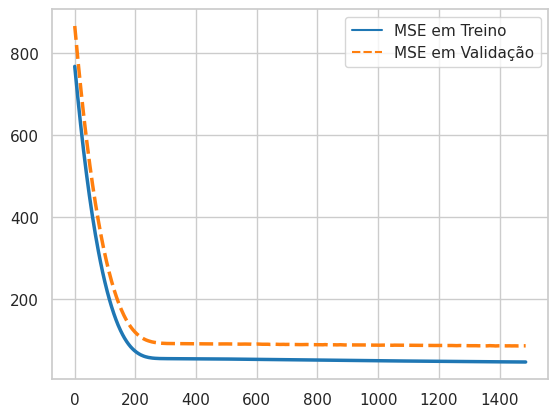

In [40]:
# Plot
sns.set(style = "whitegrid")
sns.lineplot(data = df, palette = "tab10", linewidth  = 2.5)

In [41]:
# Previsões com o modelo treinado
previsoes = modelo.predict(x_teste).flatten()

4/4 [==============================] - 0s 1ms/step


In [42]:
# Imprime as previsões
previsoes

array([21.183811, 19.214363, 23.57146 , 21.514484, 20.921219, 20.999023,
       24.057747, 21.98618 , 21.310246, 21.154636, 25.132435, 23.192162,
       21.480446, 22.632935, 23.056004, 21.752762, 26.061234, 23.133808,
       28.050133, 20.439796, 20.814236, 21.26648 , 19.856258, 21.183811,
       19.67147 , 23.260242, 22.749645, 15.941676, 18.26611 , 32.713593,
       21.655506, 19.083069, 20.478703, 22.696152, 29.747265, 23.902138,
       21.908375, 26.89278 , 25.05463 , 30.282177, 26.54752 , 28.993526,
       30.175194, 18.26611 , 22.905254, 23.075455, 19.185184, 23.294281,
       34.31347 , 32.825436, 19.024712, 32.33429 , 29.387413, 25.181065,
       23.367226, 22.696152, 25.351261, 26.746895, 24.227947, 23.921585,
       22.992786, 19.744411, 23.182438, 22.701015, 21.344284, 20.653763,
       21.451267, 22.195282, 21.78194 , 21.708996, 26.105   , 24.320343,
       13.228215, 15.717986, 18.198029, 23.133808, 18.50439 , 18.88369 ,
       23.162983, 21.665234, 20.658627, 25.215103, 

# Fim

### Obrigado

### Visite o Blog da Data Science Academy - <a href="http://blog.dsacademy.com.br">Blog DSA</a>